In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir("C:\\Users\\umang\\OneDrive\\Desktop\\gym project")

In [3]:
inout_hist = pd.read_csv("checkin_checkout_history_updated.csv")
gym_loc = pd.read_csv("gym_locations_data.csv")
subscription = pd.read_csv("subscription_plans.csv")
user_data = pd.read_csv("users_data.csv")

In [4]:
inout_hist

,user_id,gym_id,checkin_time,checkout_time,workout_type,calories_burned
0,user_3291,gym_6,2023-09-10 15:55:00,2023-09-10 16:34:00,Weightlifting,462
1,user_1944,gym_2,2023-04-13 20:07:00,2023-04-13 22:43:00,Yoga,1278
2,user_958,gym_7,2023-06-10 12:24:00,2023-06-10 13:49:00,Cardio,858
3,user_811,gym_2,2023-05-23 17:11:00,2023-05-23 20:01:00,Yoga,1134
4,user_4923,gym_10,2023-02-21 06:20:00,2023-02-21 08:02:00,Weightlifting,1049
...,...,...,...,...,...,...
299995,user_3995,gym_3,2023-08-06 17:25:00,2023-08-06 18:09:00,Pilates,288
299996,user_206,gym_9,2023-06-27 13:14:00,2023-06-27 16:04:00,Weightlifting,1935
299997,user_4983,gym_4,2023-04-08 14:41:00,2023-04-08 15:54:00,Cardio,1312
299998,user_1028,gym_10,2023-03-05 06:07:00,2023-03-05 07:04:00,Cardio,787


In [5]:
gym_loc

,gym_id,location,gym_type,facilities
0,gym_1,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court"
1,gym_2,Los Angeles,Budget,"Climbing Wall, Yoga Classes, Sauna"
2,gym_3,Chicago,Budget,"Sauna, Climbing Wall, Swimming Pool"
3,gym_4,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool"
4,gym_5,Phoenix,Standard,"Basketball Court, CrossFit, Swimming Pool"
5,gym_6,Philadelphia,Budget,"Swimming Pool, Climbing Wall, Sauna"
6,gym_7,San Antonio,Premium,"Sauna, Basketball Court, Swimming Pool"
7,gym_8,San Diego,Standard,"Basketball Court, Sauna, CrossFit"
8,gym_9,Dallas,Premium,"Sauna, CrossFit, Yoga Classes"
9,gym_10,San Jose,Premium,"Swimming Pool, Sauna, CrossFit"


In [6]:
subscription

,subscription_plan,price_per_month,features
0,Basic,19.99,"Access to basic gym facilities, Limited class ..."
1,Pro,49.99,"Access to all facilities, Unlimited class acce..."
2,Student,9.99,"Access to basic facilities, Limited class acce..."


In [7]:
user_data

,user_id,first_name,last_name,age,gender,sign_up_date,user_location,subscription_plan
0,user_1,Chris,Wilson,56,Female,06-02-2023,Denver,Basic
1,user_2,Michael,Miller,46,Non-binary,08-08-2023,Orlando,Pro
2,user_3,Daniel,Smith,32,Female,11-01-2021,Orlando,Basic
3,user_4,David,Smith,60,Male,07-08-2023,Denver,Pro
4,user_5,Chris,Jones,25,Female,08-01-2021,Denver,Basic
...,...,...,...,...,...,...,...,...
4995,user_4996,Sarah,Williams,33,Male,08-08-2021,Las Vegas,Basic
4996,user_4997,Linda,Brown,22,Male,22-01-2023,Austin,Student
4997,user_4998,Emily,Miller,38,Non-binary,16-04-2021,Atlanta,Pro
4998,user_4999,Robert,Garcia,27,Male,02-07-2022,Denver,Pro


In [8]:
user_data.isnull().sum()

user_id              0
first_name           0
last_name            0
age                  0
gender               0
sign_up_date         0
user_location        0
subscription_plan    0
dtype: int64

In [9]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            5000 non-null   object
 1   first_name         5000 non-null   object
 2   last_name          5000 non-null   object
 3   age                5000 non-null   int64 
 4   gender             5000 non-null   object
 5   sign_up_date       5000 non-null   object
 6   user_location      5000 non-null   object
 7   subscription_plan  5000 non-null   object
dtypes: int64(1), object(7)
memory usage: 312.6+ KB


In [10]:
inout_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   user_id          300000 non-null  object
 1   gym_id           300000 non-null  object
 2   checkin_time     300000 non-null  object
 3   checkout_time    300000 non-null  object
 4   workout_type     300000 non-null  object
 5   calories_burned  300000 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 13.7+ MB


In [11]:
user = pd.merge(user_data, inout_hist, on="user_id", how="left")

In [12]:
user

,user_id,first_name,last_name,age,gender,sign_up_date,user_location,subscription_plan,gym_id,checkin_time,checkout_time,workout_type,calories_burned
0,user_1,Chris,Wilson,56,Female,06-02-2023,Denver,Basic,gym_8,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468
1,user_1,Chris,Wilson,56,Female,06-02-2023,Denver,Basic,gym_9,2023-03-31 15:50:00,2023-03-31 17:52:00,Pilates,1344
2,user_1,Chris,Wilson,56,Female,06-02-2023,Denver,Basic,gym_4,2023-08-26 07:22:00,2023-08-26 09:04:00,Yoga,347
3,user_1,Chris,Wilson,56,Female,06-02-2023,Denver,Basic,gym_8,2023-03-29 20:40:00,2023-03-29 22:56:00,CrossFit,649
4,user_1,Chris,Wilson,56,Female,06-02-2023,Denver,Basic,gym_9,2023-05-02 11:49:00,2023-05-02 13:41:00,CrossFit,1136
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,user_5000,Chris,Smith,36,Male,20-02-2022,Seattle,Student,gym_4,2023-10-06 11:05:00,2023-10-06 13:47:00,CrossFit,789
299996,user_5000,Chris,Smith,36,Male,20-02-2022,Seattle,Student,gym_1,2023-06-07 12:18:00,2023-06-07 13:07:00,Swimming,633
299997,user_5000,Chris,Smith,36,Male,20-02-2022,Seattle,Student,gym_9,2023-06-02 11:01:00,2023-06-02 12:15:00,Cardio,431
299998,user_5000,Chris,Smith,36,Male,20-02-2022,Seattle,Student,gym_1,2023-07-29 09:19:00,2023-07-29 10:08:00,Pilates,1714


In [13]:
user = pd.merge(user, gym_loc, on="gym_id", how="left")

In [14]:
user

,user_id,first_name,last_name,age,gender,sign_up_date,user_location,subscription_plan,gym_id,checkin_time,checkout_time,workout_type,calories_burned,location,gym_type,facilities
0,user_1,Chris,Wilson,56,Female,06-02-2023,Denver,Basic,gym_8,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468,San Diego,Standard,"Basketball Court, Sauna, CrossFit"
1,user_1,Chris,Wilson,56,Female,06-02-2023,Denver,Basic,gym_9,2023-03-31 15:50:00,2023-03-31 17:52:00,Pilates,1344,Dallas,Premium,"Sauna, CrossFit, Yoga Classes"
2,user_1,Chris,Wilson,56,Female,06-02-2023,Denver,Basic,gym_4,2023-08-26 07:22:00,2023-08-26 09:04:00,Yoga,347,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool"
3,user_1,Chris,Wilson,56,Female,06-02-2023,Denver,Basic,gym_8,2023-03-29 20:40:00,2023-03-29 22:56:00,CrossFit,649,San Diego,Standard,"Basketball Court, Sauna, CrossFit"
4,user_1,Chris,Wilson,56,Female,06-02-2023,Denver,Basic,gym_9,2023-05-02 11:49:00,2023-05-02 13:41:00,CrossFit,1136,Dallas,Premium,"Sauna, CrossFit, Yoga Classes"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,user_5000,Chris,Smith,36,Male,20-02-2022,Seattle,Student,gym_4,2023-10-06 11:05:00,2023-10-06 13:47:00,CrossFit,789,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool"
299996,user_5000,Chris,Smith,36,Male,20-02-2022,Seattle,Student,gym_1,2023-06-07 12:18:00,2023-06-07 13:07:00,Swimming,633,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court"
299997,user_5000,Chris,Smith,36,Male,20-02-2022,Seattle,Student,gym_9,2023-06-02 11:01:00,2023-06-02 12:15:00,Cardio,431,Dallas,Premium,"Sauna, CrossFit, Yoga Classes"
299998,user_5000,Chris,Smith,36,Male,20-02-2022,Seattle,Student,gym_1,2023-07-29 09:19:00,2023-07-29 10:08:00,Pilates,1714,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court"


In [15]:
user = pd.merge(user, subscription, on="subscription_plan", how="left")

In [16]:
user

,user_id,first_name,last_name,age,gender,sign_up_date,user_location,subscription_plan,gym_id,checkin_time,checkout_time,workout_type,calories_burned,location,gym_type,facilities,price_per_month,features
0,user_1,Chris,Wilson,56,Female,06-02-2023,Denver,Basic,gym_8,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ..."
1,user_1,Chris,Wilson,56,Female,06-02-2023,Denver,Basic,gym_9,2023-03-31 15:50:00,2023-03-31 17:52:00,Pilates,1344,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ..."
2,user_1,Chris,Wilson,56,Female,06-02-2023,Denver,Basic,gym_4,2023-08-26 07:22:00,2023-08-26 09:04:00,Yoga,347,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",19.99,"Access to basic gym facilities, Limited class ..."
3,user_1,Chris,Wilson,56,Female,06-02-2023,Denver,Basic,gym_8,2023-03-29 20:40:00,2023-03-29 22:56:00,CrossFit,649,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ..."
4,user_1,Chris,Wilson,56,Female,06-02-2023,Denver,Basic,gym_9,2023-05-02 11:49:00,2023-05-02 13:41:00,CrossFit,1136,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,user_5000,Chris,Smith,36,Male,20-02-2022,Seattle,Student,gym_4,2023-10-06 11:05:00,2023-10-06 13:47:00,CrossFit,789,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",9.99,"Access to basic facilities, Limited class acce..."
299996,user_5000,Chris,Smith,36,Male,20-02-2022,Seattle,Student,gym_1,2023-06-07 12:18:00,2023-06-07 13:07:00,Swimming,633,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",9.99,"Access to basic facilities, Limited class acce..."
299997,user_5000,Chris,Smith,36,Male,20-02-2022,Seattle,Student,gym_9,2023-06-02 11:01:00,2023-06-02 12:15:00,Cardio,431,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",9.99,"Access to basic facilities, Limited class acce..."
299998,user_5000,Chris,Smith,36,Male,20-02-2022,Seattle,Student,gym_1,2023-07-29 09:19:00,2023-07-29 10:08:00,Pilates,1714,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",9.99,"Access to basic facilities, Limited class acce..."


In [17]:
user["name"] = user["first_name"]+ " " + user["last_name"]

In [18]:
user

,user_id,first_name,last_name,age,gender,sign_up_date,user_location,subscription_plan,gym_id,checkin_time,checkout_time,workout_type,calories_burned,location,gym_type,facilities,price_per_month,features,name
0,user_1,Chris,Wilson,56,Female,06-02-2023,Denver,Basic,gym_8,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ...",Chris Wilson
1,user_1,Chris,Wilson,56,Female,06-02-2023,Denver,Basic,gym_9,2023-03-31 15:50:00,2023-03-31 17:52:00,Pilates,1344,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ...",Chris Wilson
2,user_1,Chris,Wilson,56,Female,06-02-2023,Denver,Basic,gym_4,2023-08-26 07:22:00,2023-08-26 09:04:00,Yoga,347,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",19.99,"Access to basic gym facilities, Limited class ...",Chris Wilson
3,user_1,Chris,Wilson,56,Female,06-02-2023,Denver,Basic,gym_8,2023-03-29 20:40:00,2023-03-29 22:56:00,CrossFit,649,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ...",Chris Wilson
4,user_1,Chris,Wilson,56,Female,06-02-2023,Denver,Basic,gym_9,2023-05-02 11:49:00,2023-05-02 13:41:00,CrossFit,1136,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ...",Chris Wilson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,user_5000,Chris,Smith,36,Male,20-02-2022,Seattle,Student,gym_4,2023-10-06 11:05:00,2023-10-06 13:47:00,CrossFit,789,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",9.99,"Access to basic facilities, Limited class acce...",Chris Smith
299996,user_5000,Chris,Smith,36,Male,20-02-2022,Seattle,Student,gym_1,2023-06-07 12:18:00,2023-06-07 13:07:00,Swimming,633,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",9.99,"Access to basic facilities, Limited class acce...",Chris Smith
299997,user_5000,Chris,Smith,36,Male,20-02-2022,Seattle,Student,gym_9,2023-06-02 11:01:00,2023-06-02 12:15:00,Cardio,431,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",9.99,"Access to basic facilities, Limited class acce...",Chris Smith
299998,user_5000,Chris,Smith,36,Male,20-02-2022,Seattle,Student,gym_1,2023-07-29 09:19:00,2023-07-29 10:08:00,Pilates,1714,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",9.99,"Access to basic facilities, Limited class acce...",Chris Smith


In [19]:
df = user.iloc[:,:1].join(user.iloc[:,-1]).join(user.iloc[:,3:-1])

In [20]:
df

,user_id,name,age,gender,sign_up_date,user_location,subscription_plan,gym_id,checkin_time,checkout_time,workout_type,calories_burned,location,gym_type,facilities,price_per_month,features
0,user_1,Chris Wilson,56,Female,06-02-2023,Denver,Basic,gym_8,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ..."
1,user_1,Chris Wilson,56,Female,06-02-2023,Denver,Basic,gym_9,2023-03-31 15:50:00,2023-03-31 17:52:00,Pilates,1344,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ..."
2,user_1,Chris Wilson,56,Female,06-02-2023,Denver,Basic,gym_4,2023-08-26 07:22:00,2023-08-26 09:04:00,Yoga,347,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",19.99,"Access to basic gym facilities, Limited class ..."
3,user_1,Chris Wilson,56,Female,06-02-2023,Denver,Basic,gym_8,2023-03-29 20:40:00,2023-03-29 22:56:00,CrossFit,649,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ..."
4,user_1,Chris Wilson,56,Female,06-02-2023,Denver,Basic,gym_9,2023-05-02 11:49:00,2023-05-02 13:41:00,CrossFit,1136,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,user_5000,Chris Smith,36,Male,20-02-2022,Seattle,Student,gym_4,2023-10-06 11:05:00,2023-10-06 13:47:00,CrossFit,789,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",9.99,"Access to basic facilities, Limited class acce..."
299996,user_5000,Chris Smith,36,Male,20-02-2022,Seattle,Student,gym_1,2023-06-07 12:18:00,2023-06-07 13:07:00,Swimming,633,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",9.99,"Access to basic facilities, Limited class acce..."
299997,user_5000,Chris Smith,36,Male,20-02-2022,Seattle,Student,gym_9,2023-06-02 11:01:00,2023-06-02 12:15:00,Cardio,431,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",9.99,"Access to basic facilities, Limited class acce..."
299998,user_5000,Chris Smith,36,Male,20-02-2022,Seattle,Student,gym_1,2023-07-29 09:19:00,2023-07-29 10:08:00,Pilates,1714,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",9.99,"Access to basic facilities, Limited class acce..."


In [21]:
user=df

In [22]:
user

,user_id,name,age,gender,sign_up_date,user_location,subscription_plan,gym_id,checkin_time,checkout_time,workout_type,calories_burned,location,gym_type,facilities,price_per_month,features
0,user_1,Chris Wilson,56,Female,06-02-2023,Denver,Basic,gym_8,2023-03-19 08:22:00,2023-03-19 10:36:00,Swimming,468,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ..."
1,user_1,Chris Wilson,56,Female,06-02-2023,Denver,Basic,gym_9,2023-03-31 15:50:00,2023-03-31 17:52:00,Pilates,1344,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ..."
2,user_1,Chris Wilson,56,Female,06-02-2023,Denver,Basic,gym_4,2023-08-26 07:22:00,2023-08-26 09:04:00,Yoga,347,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",19.99,"Access to basic gym facilities, Limited class ..."
3,user_1,Chris Wilson,56,Female,06-02-2023,Denver,Basic,gym_8,2023-03-29 20:40:00,2023-03-29 22:56:00,CrossFit,649,San Diego,Standard,"Basketball Court, Sauna, CrossFit",19.99,"Access to basic gym facilities, Limited class ..."
4,user_1,Chris Wilson,56,Female,06-02-2023,Denver,Basic,gym_9,2023-05-02 11:49:00,2023-05-02 13:41:00,CrossFit,1136,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",19.99,"Access to basic gym facilities, Limited class ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,user_5000,Chris Smith,36,Male,20-02-2022,Seattle,Student,gym_4,2023-10-06 11:05:00,2023-10-06 13:47:00,CrossFit,789,Houston,Premium,"Climbing Wall, Basketball Court, Swimming Pool",9.99,"Access to basic facilities, Limited class acce..."
299996,user_5000,Chris Smith,36,Male,20-02-2022,Seattle,Student,gym_1,2023-06-07 12:18:00,2023-06-07 13:07:00,Swimming,633,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",9.99,"Access to basic facilities, Limited class acce..."
299997,user_5000,Chris Smith,36,Male,20-02-2022,Seattle,Student,gym_9,2023-06-02 11:01:00,2023-06-02 12:15:00,Cardio,431,Dallas,Premium,"Sauna, CrossFit, Yoga Classes",9.99,"Access to basic facilities, Limited class acce..."
299998,user_5000,Chris Smith,36,Male,20-02-2022,Seattle,Student,gym_1,2023-07-29 09:19:00,2023-07-29 10:08:00,Pilates,1714,New York,Premium,"Climbing Wall, Swimming Pool, Basketball Court",9.99,"Access to basic facilities, Limited class acce..."


# Univariate Analysis

In [24]:
# 1. Gender
# 2.Subscription
# 3. workout_type
# 4. gym_type
# 5. Age

<Axes: xlabel='age', ylabel='Count'>

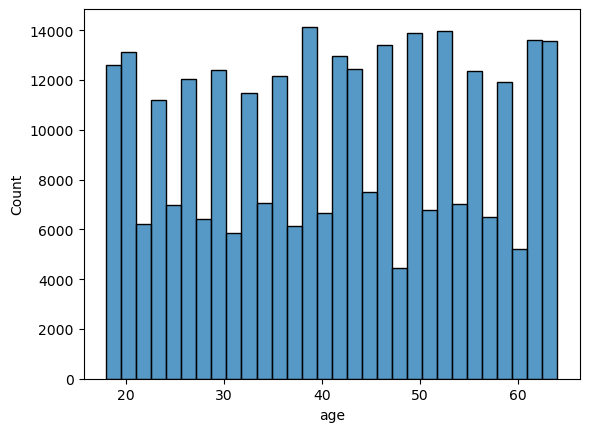

In [25]:
sns.histplot(x=user["age"], bins=30)

<Axes: xlabel='subscription_plan', ylabel='count'>

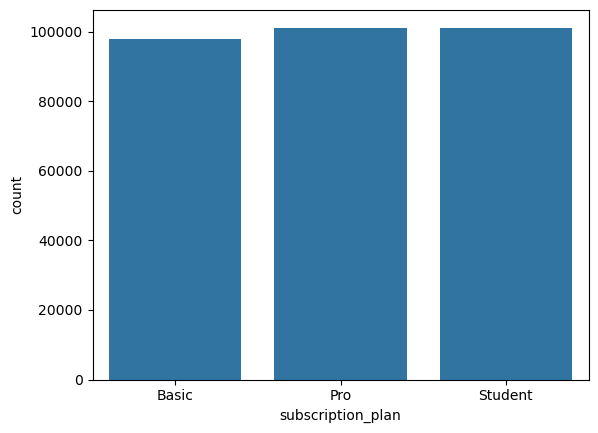

In [26]:
sns.countplot(x=user["subscription_plan"])

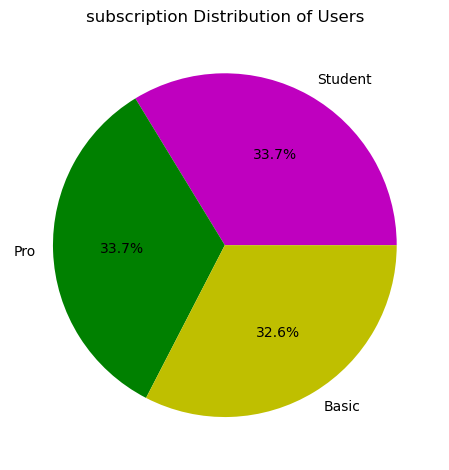

In [27]:
sub_count = user['subscription_plan'].value_counts()
plt.pie(sub_count, labels = sub_count.index, autopct = '%1.1f%%', colors = ['m','g','y'])
plt.title('subscription Distribution of Users')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


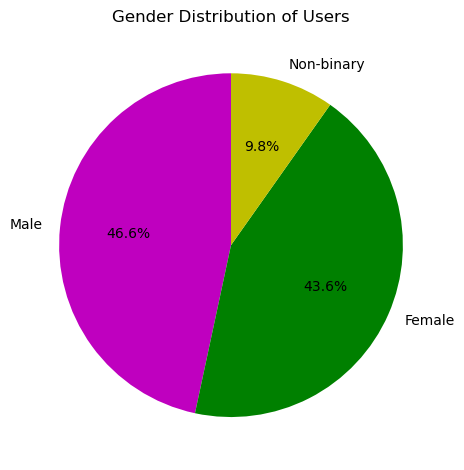

In [28]:
gender_counts = user['gender'].value_counts()
plt.pie(gender_counts, labels = gender_counts.index, autopct = '%1.1f%%', startangle=90, colors = ['m','g','y'])
plt.title('Gender Distribution of Users')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [29]:
user['workout_type'].unique()

array(['Swimming', 'Pilates', 'Yoga', 'CrossFit', 'Weightlifting',
       'Cardio'], dtype=object)

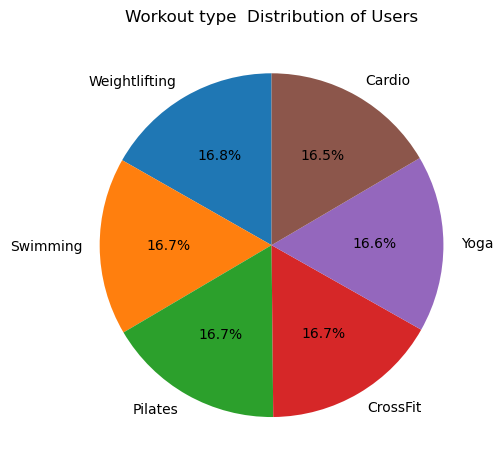

In [30]:
workout = user['workout_type'].value_counts()
plt.pie(workout, labels = workout.index, autopct = '%1.1f%%', startangle=90)
plt.title('Workout type  Distribution of Users')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

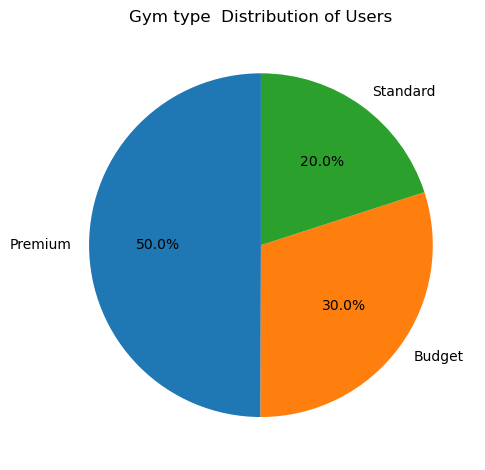

In [31]:
gymtype = user['gym_type'].value_counts()
plt.pie(gymtype, labels = gymtype.index, autopct = '%1.1f%%', startangle=90)
plt.title('Gym type  Distribution of Users')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Bivariate / Multivariate Analysis

In [33]:
#gym type and their charges as per their location


([0, 1, 2], [Text(0, 0, 'Basic'), Text(1, 0, 'Pro'), Text(2, 0, 'Student')])

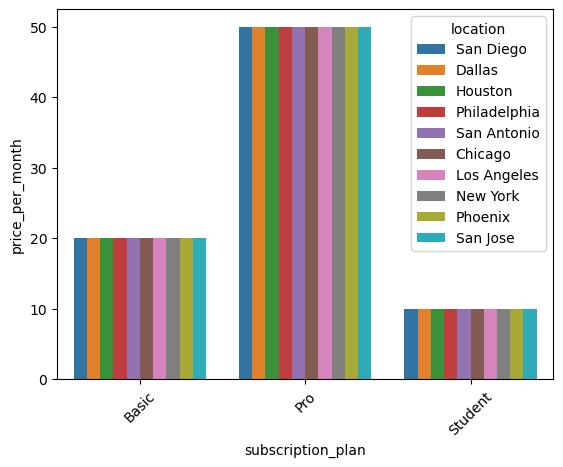

In [34]:
sns.barplot(x=user['subscription_plan'], y=user['price_per_month'], hue=user['location'])
plt.xticks(rotation=45)


([0, 1, 2], [Text(0, 0, 'Basic'), Text(1, 0, 'Pro'), Text(2, 0, 'Student')])

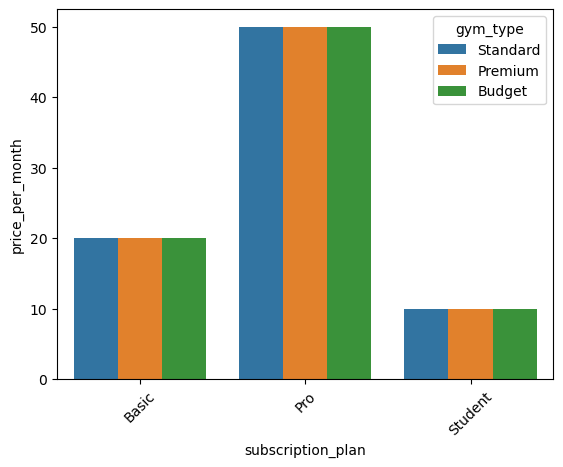

In [35]:
sns.barplot(x=user['subscription_plan'], y=user['price_per_month'], hue=user['gym_type'])
plt.xticks(rotation=45)

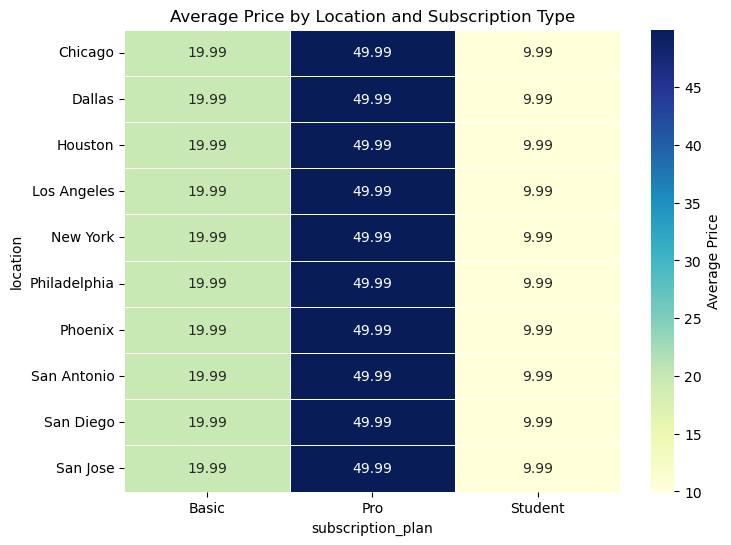

In [36]:
pivot_table = user.pivot_table(index='location', columns='subscription_plan', values='price_per_month', aggfunc='mean')

# Step 2: Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5, cbar_kws={'label': 'Average Price'})
plt.title('Average Price by Location and Subscription Type')
plt.show()

### the analysis shows Price varies as per the subscription plan and is independent of gym_type and location

In [38]:
user.groupby(['name']).size()

name
Chris Brown        2040
Chris Davis        2301
Chris Garcia       1976
Chris Johnson      2047
Chris Jones        2318
                   ... 
Sarah Moore        1520
Sarah Rodriguez    2137
Sarah Smith        1811
Sarah Williams     2108
Sarah Wilson       1542
Length: 144, dtype: int64

In [39]:
user['name'].unique()

array(['Chris Wilson', 'Michael Miller', 'Daniel Smith', 'David Smith',
       'Chris Jones', 'Jessica Rodriguez', 'Linda Jones', 'Jane Brown',
       'Robert Davis', 'John Jones', 'Chris Smith', 'Sarah Martinez',
       'Sarah Wilson', 'Emily Jones', 'Michael Garcia', 'Jane Martinez',
       'Michael Wilson', 'Sarah Johnson', 'Emily Moore', 'Sarah Williams',
       'John Miller', 'Linda Moore', 'Sarah Smith', 'Linda Brown',
       'Daniel Jones', 'Emily Wilson', 'Chris Brown', 'Emily Martinez',
       'Robert Wilson', 'Chris Garcia', 'Jane Williams',
       'Laura Rodriguez', 'Sarah Jones', 'Jessica Miller', 'Linda Smith',
       'Sarah Garcia', 'Jane Jones', 'Emily Miller', 'John Davis',
       'Jessica Moore', 'Laura Smith', 'Jane Wilson', 'Laura Johnson',
       'David Davis', 'Robert Miller', 'Jessica Davis', 'Robert Jones',
       'Jessica Garcia', 'David Johnson', 'Jessica Wilson', 'Sarah Moore',
       'David Rodriguez', 'Robert Garcia', 'Linda Wilson',
       'John Williams', 

In [40]:
user['name'].value_counts()

name
Chris Miller         2951
Jessica Rodriguez    2882
Emily Jones          2869
David Moore          2864
Jane Miller          2811
                     ... 
Laura Smith          1351
Linda Brown          1332
Jessica Wilson       1322
John Rodriguez       1185
Jessica Johnson       951
Name: count, Length: 144, dtype: int64

In [41]:
# which gender in each location prefers which workout_type?


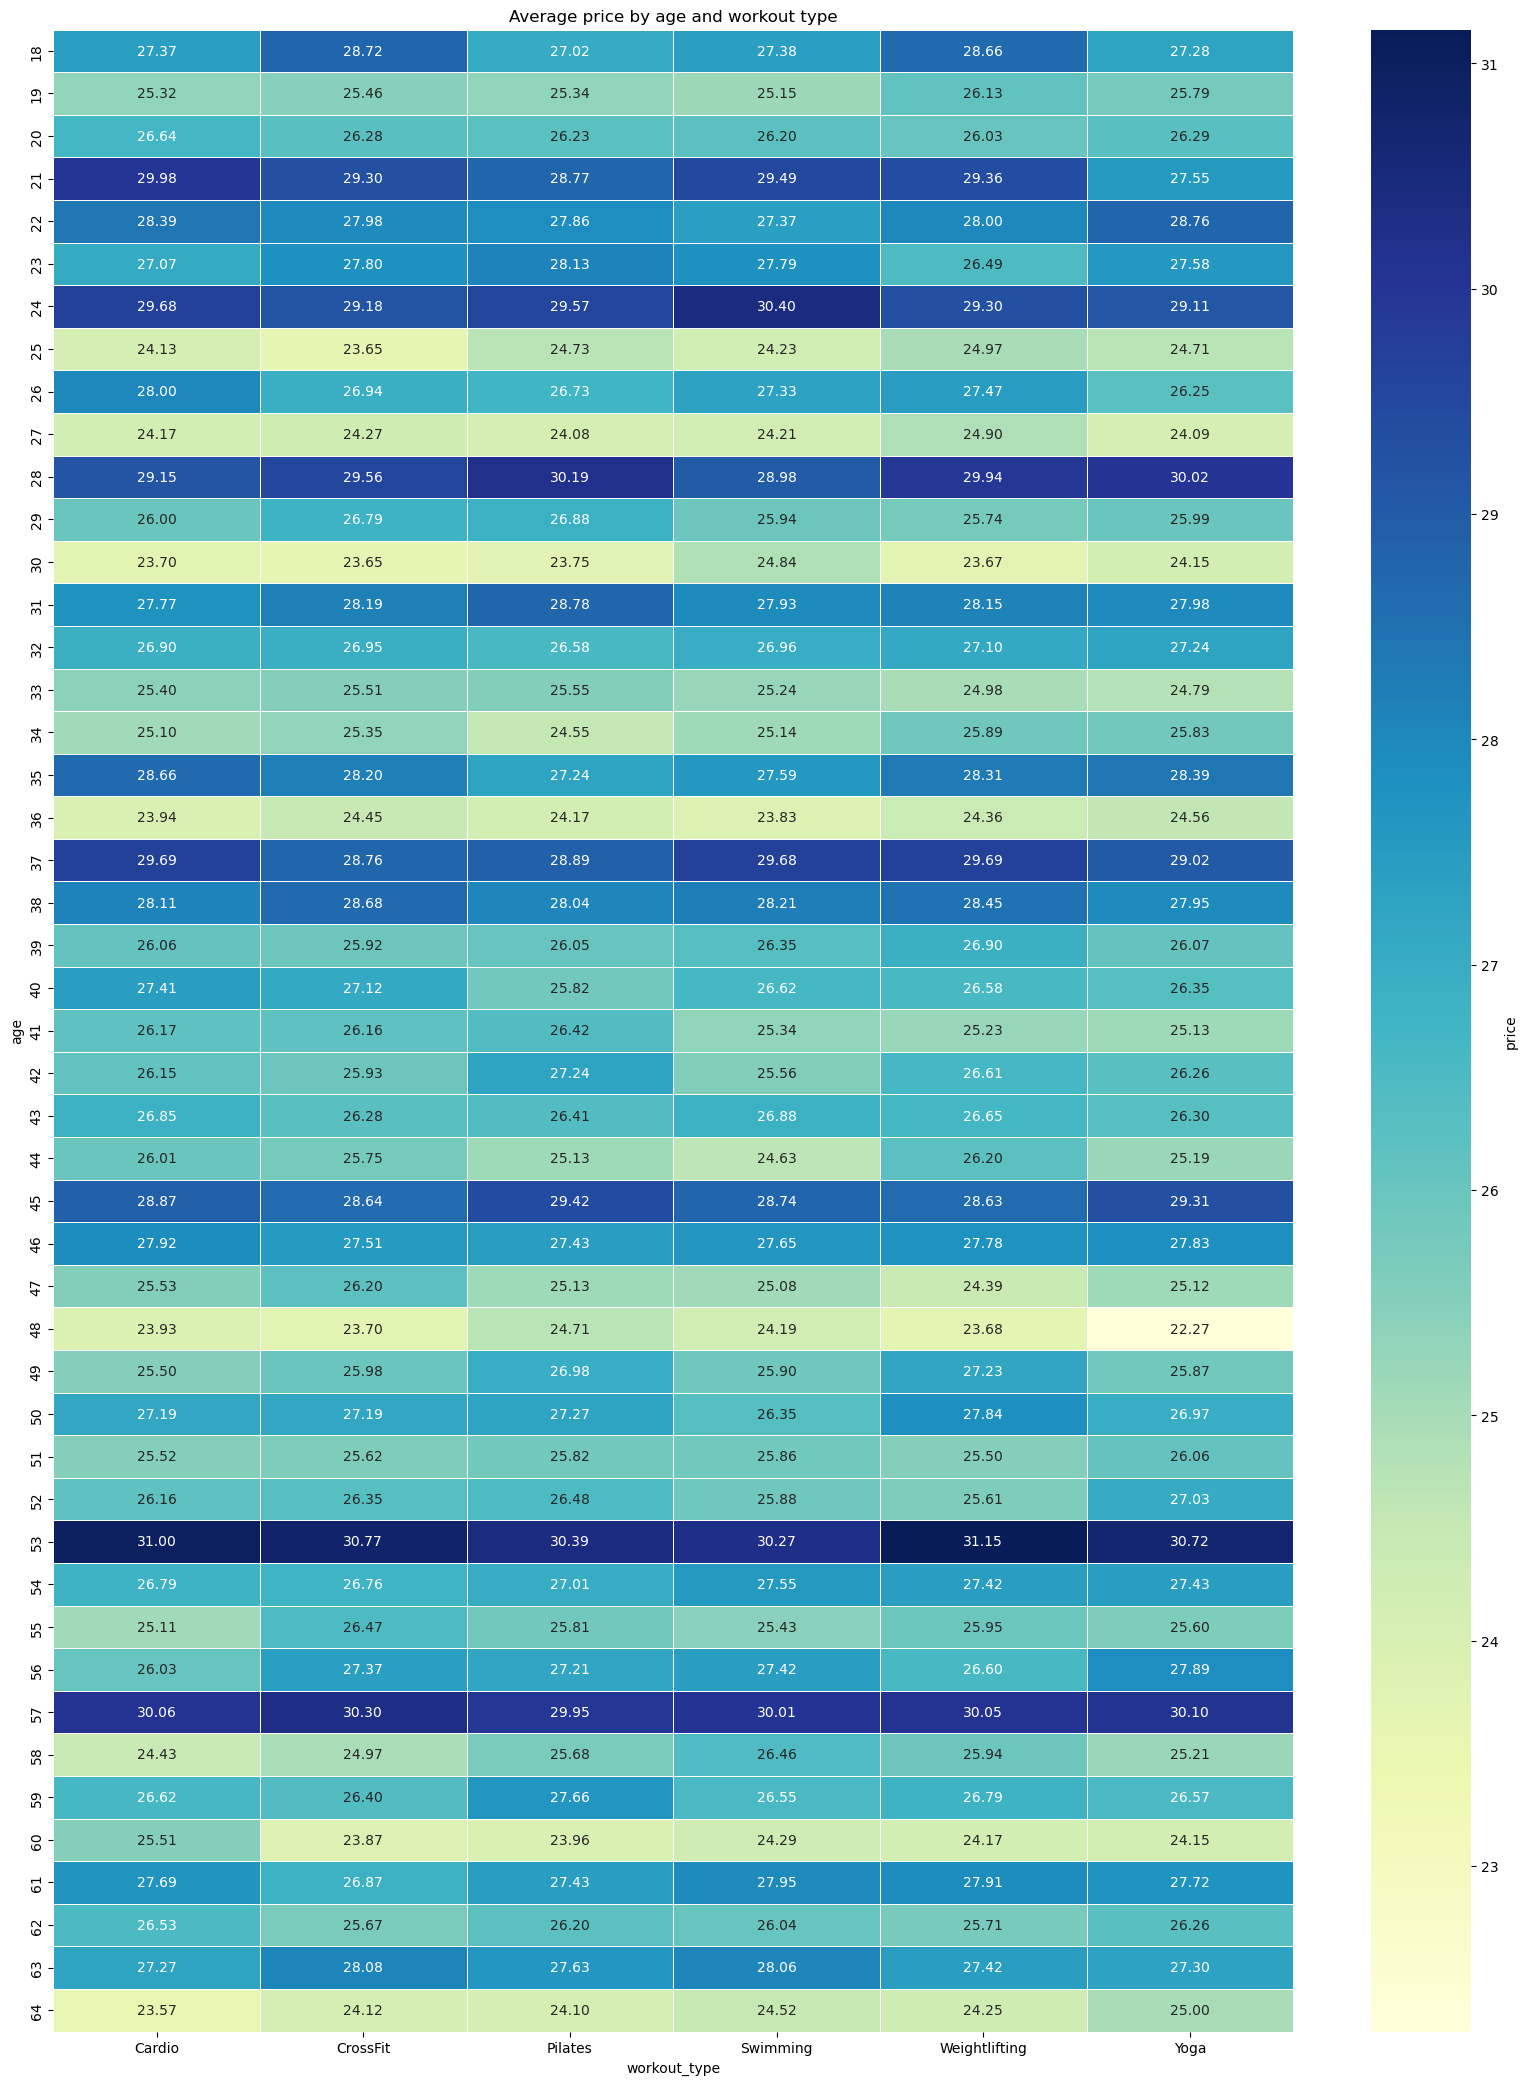

In [113]:
pivot_table = user.pivot_table(index='age', columns='workout_type', values='price_per_month', aggfunc='mean')

# Step 2: Plot the heatmap
plt.figure(figsize=(20, 26))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5, cbar_kws={'label': 'price'})
plt.title('Average price by age and workout type')
plt.show()

In [43]:
ab = user.groupby(['subscription_plan','age']).size()
ab.sort_values(ascending=False).head(50)

subscription_plan  age
Student            52     3181
                   43     3028
                   64     3015
Pro                45     2990
                   53     2926
Student            25     2909
Pro                38     2835
Basic              49     2832
                   64     2812
Pro                57     2809
Student            41     2686
Pro                28     2666
                   21     2664
Student            30     2642
                   34     2623
                   51     2612
Pro                46     2607
Basic              62     2603
                   20     2602
Pro                52     2594
                   43     2565
Student            62     2517
Basic              36     2507
Pro                54     2487
Student            38     2467
Basic              58     2443
                   40     2442
Student            46     2433
Basic              56     2417
Student            54     2416
Basic              50     2416
Pro             

### From the above analysis ages corresponding to darker shades have opted for the pro subscription_plan or are paying more in the gym
### Another important observation is that certain age groups which are more paying more in gym are almost equally investing in all workout types

In [45]:
#analysing checkin checkout

<Axes: xlabel='age', ylabel='calories_burned'>

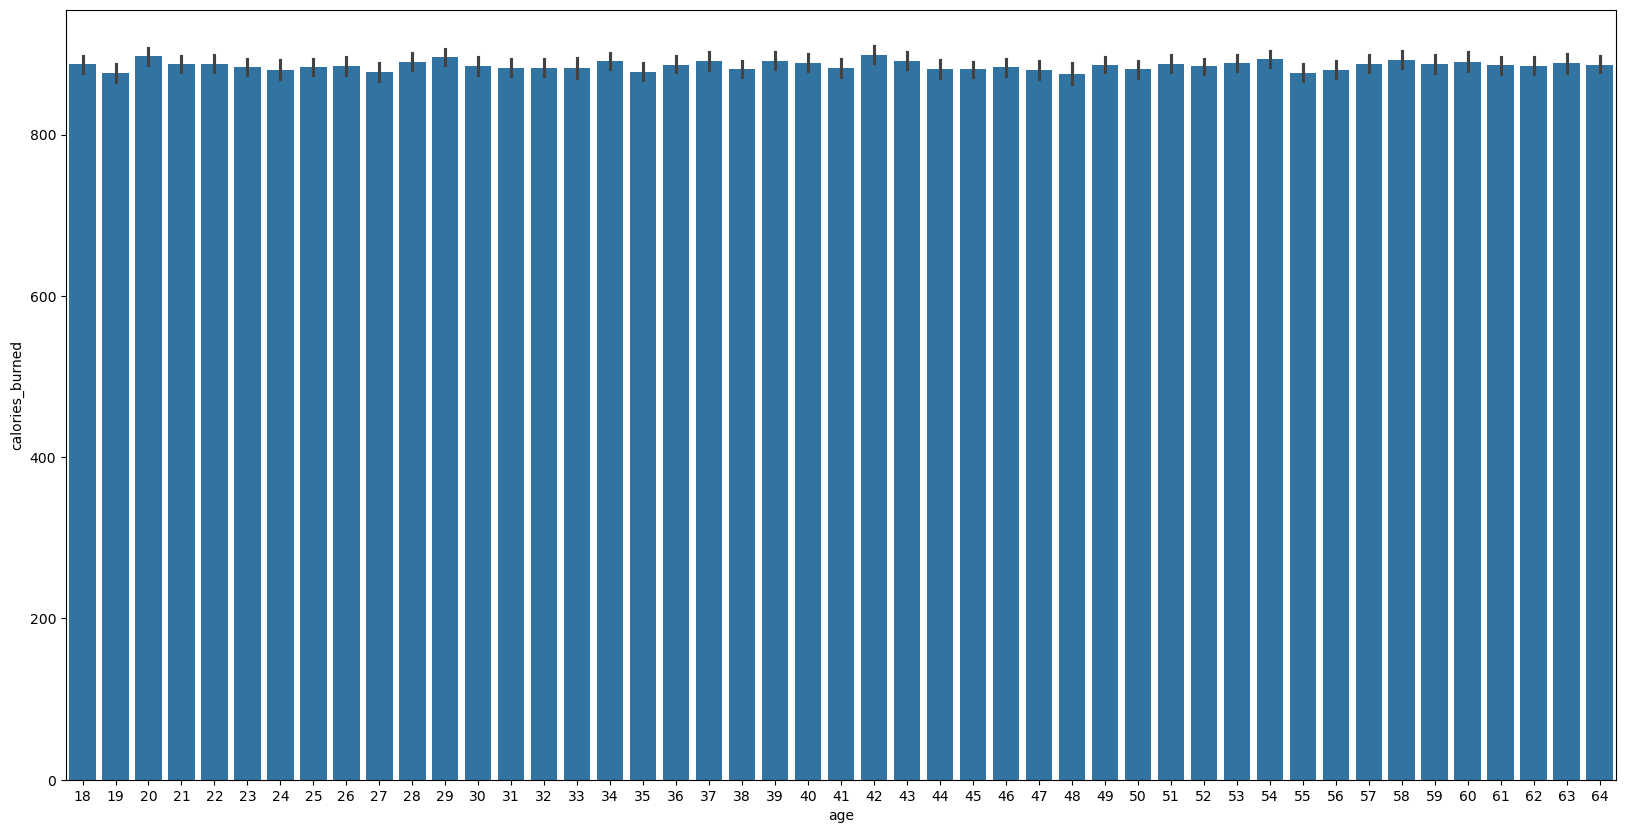

In [46]:
plt.figure(figsize=(20, 10))
sns.barplot(x=user["age"], y=user["calories_burned"])

In [47]:
pv = user.pivot_table(index='age' , columns='gender' , values='calories_burned' ,aggfunc='mean') 
pv

gender,Female,Male,Non-binary
age,,,
18,889.247382,883.575188,893.860526
19,878.183261,871.616211,893.138462
20,902.911168,891.802206,898.248499
21,887.994681,882.213383,913.692182
22,875.031627,902.326394,876.058431
23,894.144823,876.701951,873.569328
24,876.636918,889.445686,845.793651
25,887.669489,881.089892,869.358289
26,879.110175,887.763487,898.762737


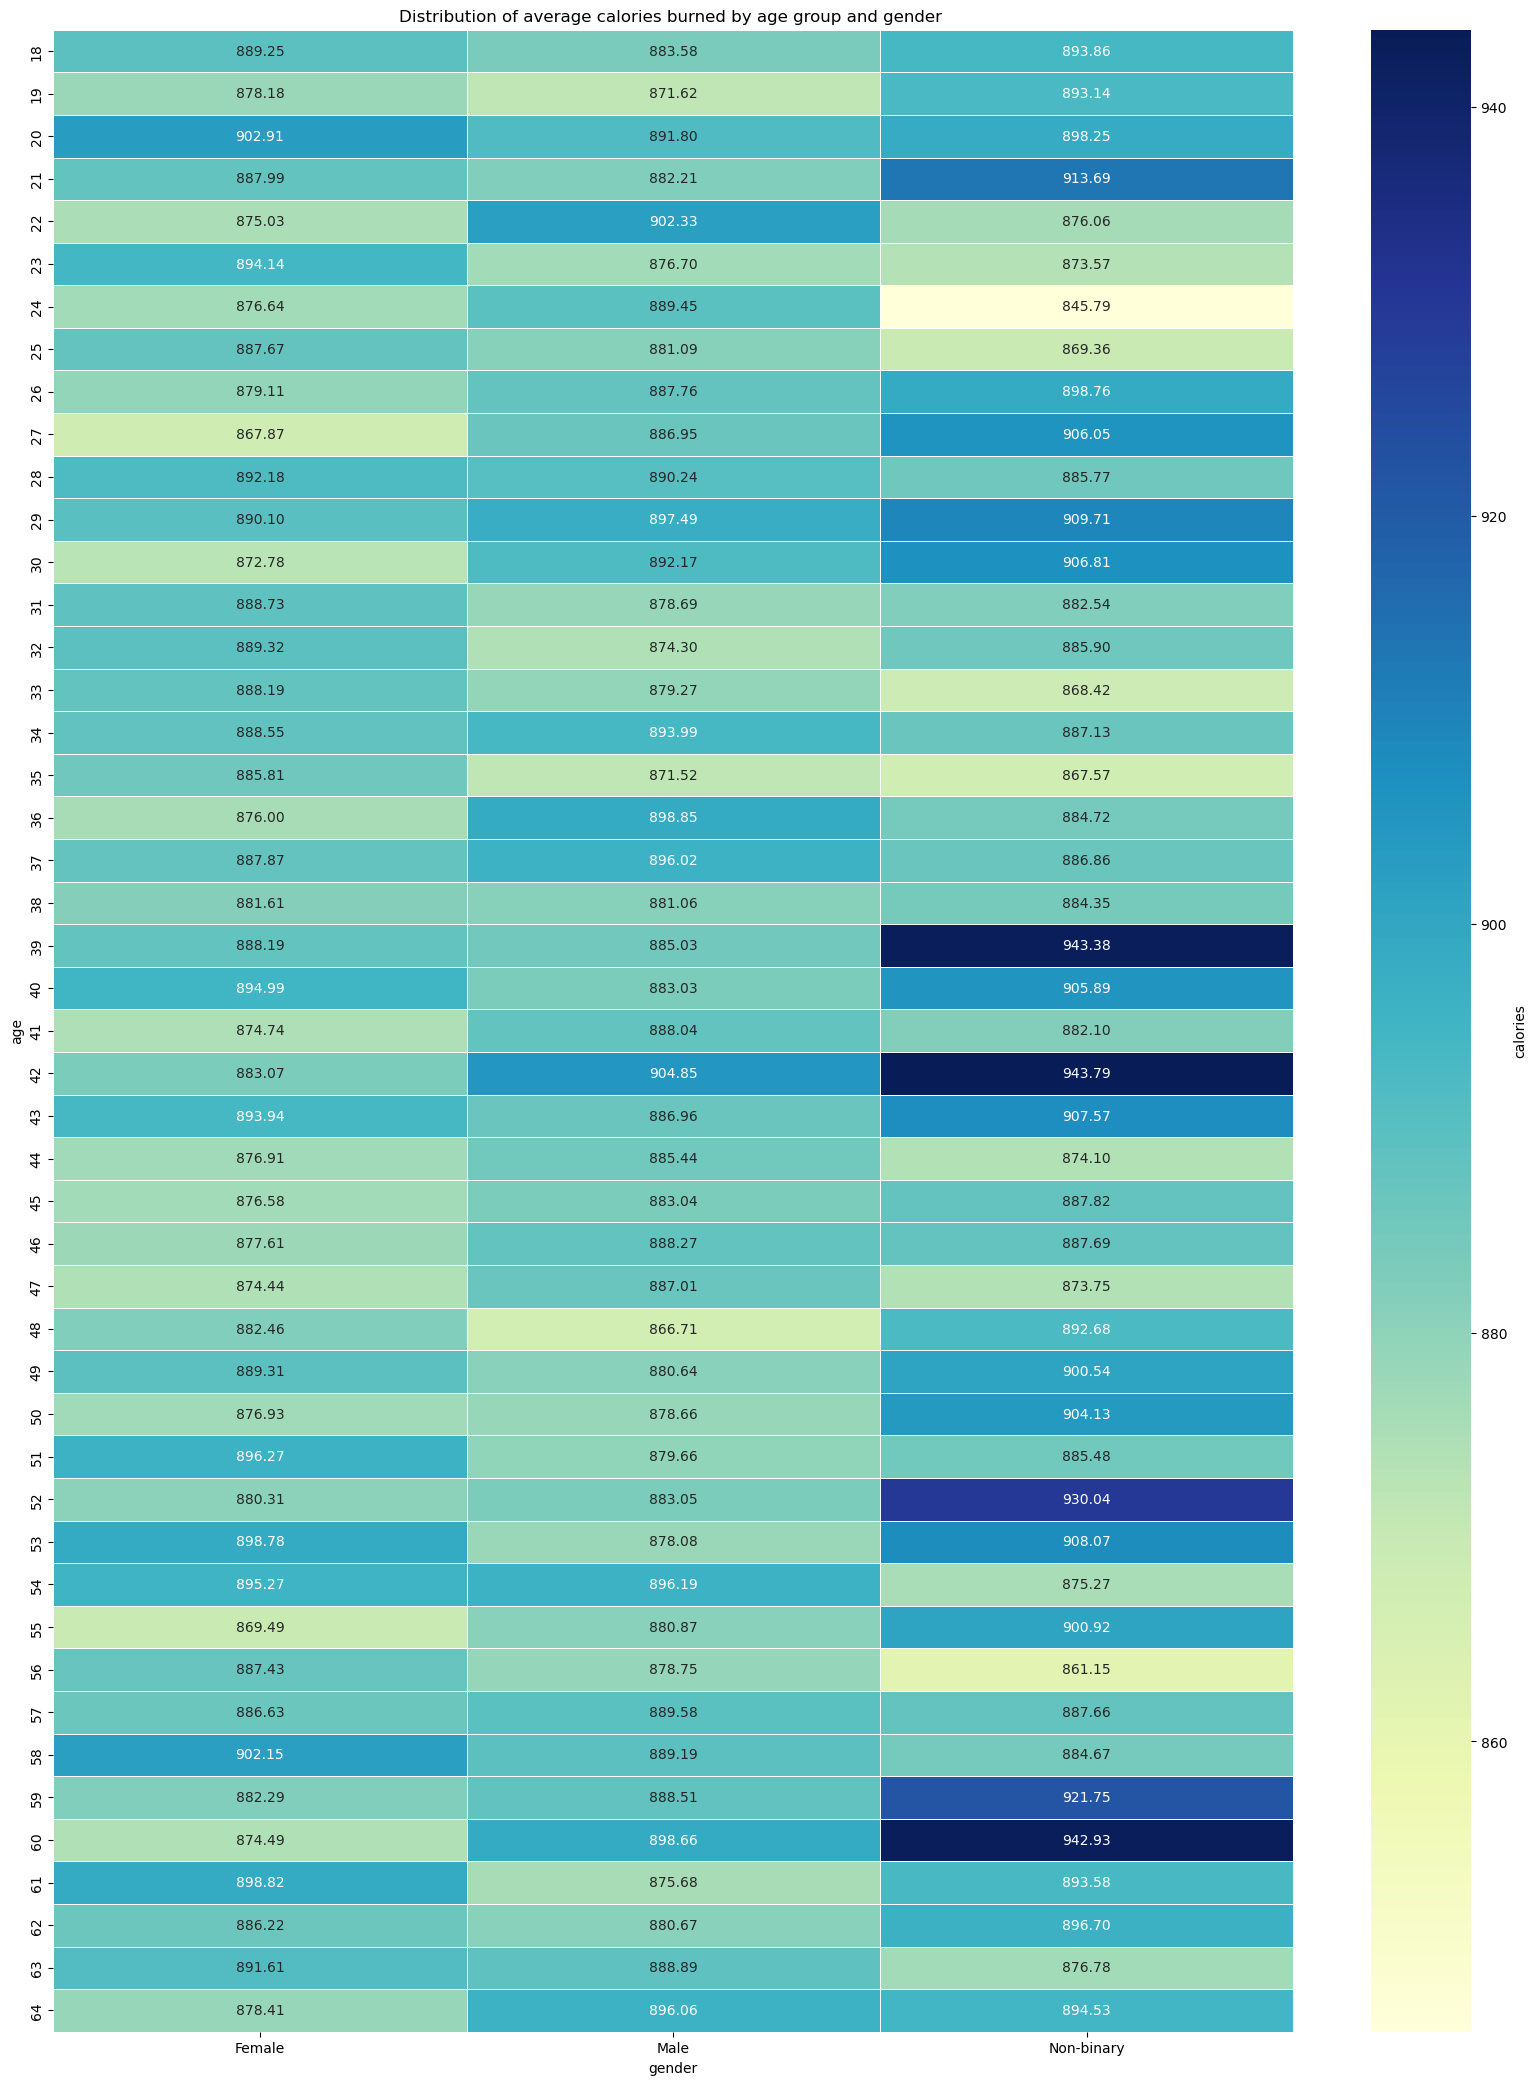

In [117]:
# Step 2: Plot the heatmap
plt.figure(figsize=(20, 26))
sns.heatmap(pv, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5, cbar_kws={'label': 'calories'})
plt.title('Distribution of average calories burned by age group and gender ')
plt.show()

### the analysis shows that the average calories burnt by each age group everyday is above 845. 
### It can also be seen that for most age groups,non- binary gender has burnt more calories.
